In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("data/Ames_Housing_Data.tsv", sep="\t", delim_whitespace=False)

In [3]:
df.rename(lambda x: x.replace(" ","_") if " " in x else x, axis=1, inplace=True)

<AxesSubplot:>

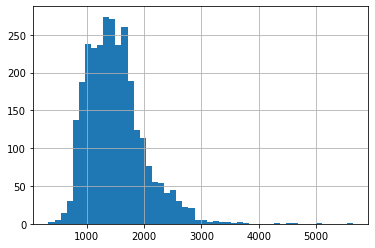

In [4]:
df.Gr_Liv_Area.hist(bins=50)

In [5]:
data = df.copy()

In [6]:
df = df.loc[df.Gr_Liv_Area < 4000]

In [7]:
df = df.drop(["PID","Order"],axis=1)

In [8]:
# ONE-HOT encoding: string variables to multiple colums with 0,1 values

ohe = df.select_dtypes("object").columns
pd.get_dummies(df[ohe], ohe.to_list()).describe()

,MS_Zoning_A (agr),MS_Zoning_C (all),MS_Zoning_FV,MS_Zoning_I (all),MS_Zoning_RH,MS_Zoning_RL,MS_Zoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,...,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_Abnorml,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,0.000684,0.008547,0.047521,0.000684,0.009231,0.775385,0.157949,0.004103,0.995897,0.041026,...,0.080684,0.002393,0.000342,0.866325,0.064615,0.004103,0.008205,0.015726,0.824615,0.082735
std,0.026144,0.092070,0.212788,0.026144,0.095649,0.417400,0.364755,0.063931,0.063931,0.198383,...,0.272395,0.048870,0.018490,0.340361,0.245888,0.063931,0.090225,0.124437,0.380361,0.275528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Skew
serie_skew = df.skew()
serie_skew = serie_skew[abs(serie_skew) > 0.75]

In [21]:
serie_skew.sort_values()

BsmtFin_SF_1        0.821985
2nd_Flr_SF          0.847517
Gr_Liv_Area         0.878879
Bsmt_Unf_SF         0.925021
1st_Flr_SF          0.942615
Lot_Frontage        1.111071
MS_SubClass         1.356549
SalePrice           1.591072
Wood_Deck_SF        1.848286
Open_Porch_SF       2.495162
Mas_Vnr_Area        2.565458
Screen_Porch        3.953495
Bsmt_Half_Bath      3.965970
Enclosed_Porch      4.010586
BsmtFin_SF_2        4.135900
Kitchen_AbvGr       4.309573
3Ssn_Porch         11.393854
Low_Qual_Fin_SF    12.107629
Lot_Area           13.200004
Pool_Area          18.743766
Misc_Val           22.225015
dtype: float64

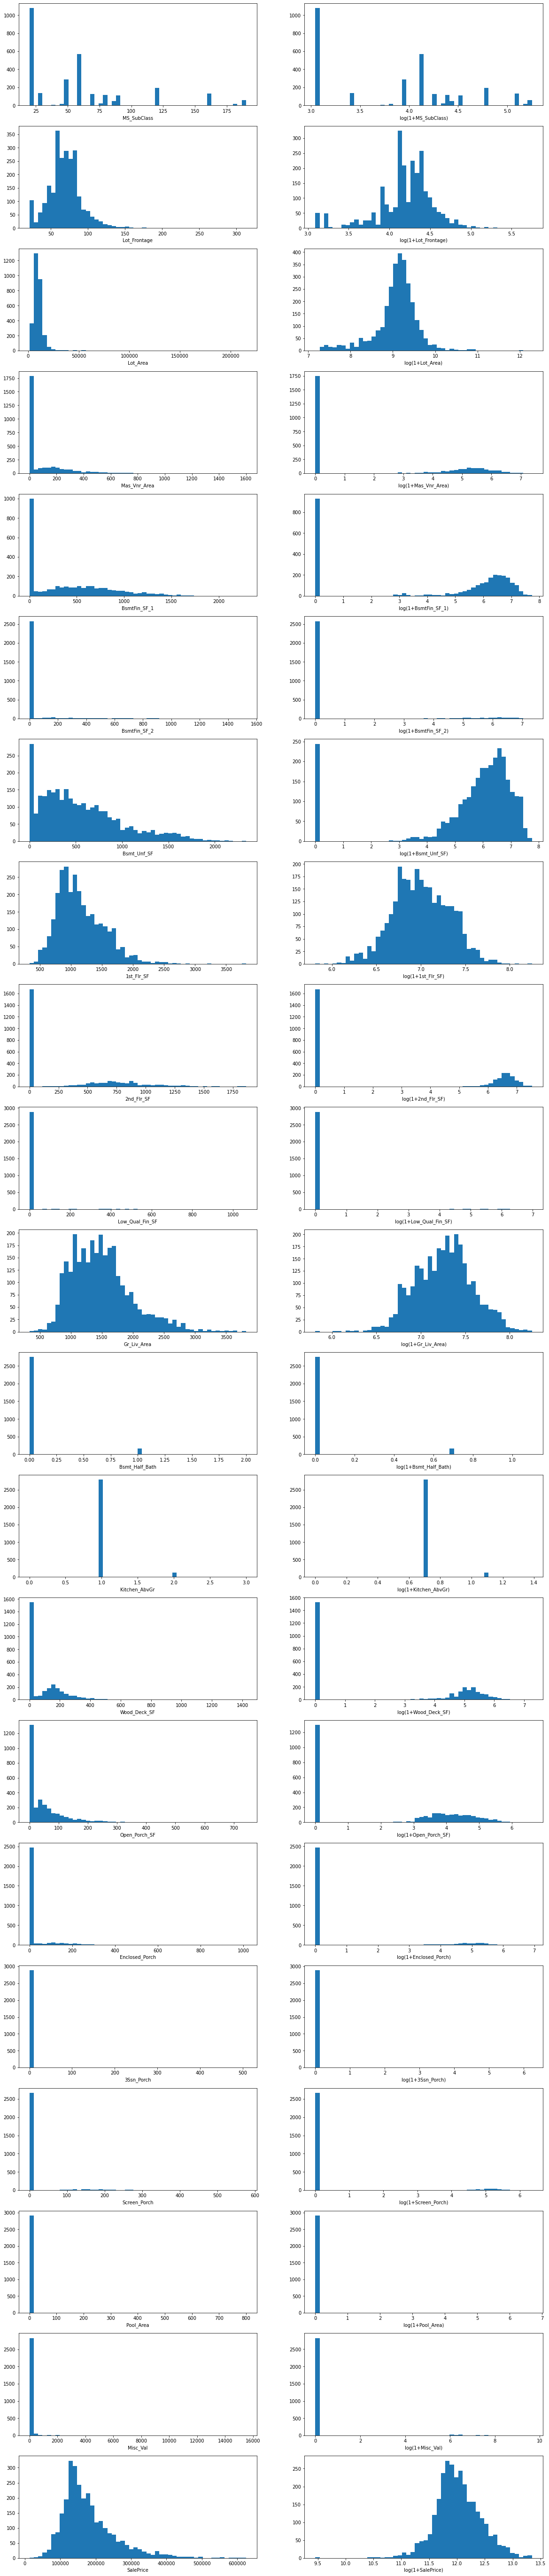

In [58]:
features = serie_skew.index.to_list()
#fig, axis = plt.subplots(len(features),2, figsize=(10,50))
#df[features].hist(bins=50).flatten()
fig, axis = plt.subplots(len(features),2, figsize=(20,100))

for idx,f in enumerate(features):
    axis[idx,0].hist(df[f], bins=50)
    axis[idx,0].set_xlabel(f)
    axis[idx,1].hist(np.log1p(df[f]), bins=50)
    axis[idx,1].set_xlabel('log(1+{})'.format(f))
    
plt.show()

# it does not look a really good transformation